## 2. Multiple Logistic Regression

## Some of the cities have been given the status of Special Assistance Area on medical background, the 
## objective is to come up with a model which can be used to make the decision if any new city should
## be given this status based on given health and Medical conditions.


### dependent variable : special_assistance_area
### independent variables : doctor_availability_rate,hospital_availability_rate,
### annual_per_capita,population_density, state,death_rate


## special_assistance_area - ln(p/1-p) = B0 + B1*doctor_availability_rate +
## B2*hospital_availability_rate + B3*annual_per_capita + B4*population_density +
## B5*death_rate + B6*s1 + B7*s2 +B8*s3 + B9*s4

In [137]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import os
os.getcwd()

'D:\\Anaconda_Python\\Python_Code'

In [138]:
os.chdir("D:\Anaconda_Python\Python_Code")

In [139]:
data = pd.read_csv("Health_data_new_saa.csv")

In [140]:
pd.options.display.max_rows = 999

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
City_ID                       2000 non-null int64
State                         2000 non-null object
doctor_availability_rate      2000 non-null float64
hospital_availability_rate    2000 non-null float64
annual_per_capita             2000 non-null float64
population_density            2000 non-null float64
death_rate                    1967 non-null float64
special_assistance_area       2000 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 125.1+ KB


In [142]:
data.describe()

,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1967.000000
mean,1999.500000,584.579841,663.231582,18.222888,37.277126,9.290993
std,577.494589,144.085315,151.363999,3.595416,7.145640,1.724680
min,1000.000000,44.155200,86.663459,4.009732,10.894868,3.186223
25%,1499.750000,509.065656,577.497153,16.229899,33.401743,8.322182
50%,1999.500000,593.901162,676.518731,18.491890,37.778280,9.437314
75%,2499.250000,676.737022,764.318146,20.516293,41.861463,10.376068
max,2999.000000,952.193953,1068.699512,28.095823,54.896516,13.316359


In [143]:
pd.isna(data.death_rate).value_counts()

False    1967
True       33
Name: death_rate, dtype: int64


## Dropping records with null values

In [144]:
data.dropna(inplace=True)

In [145]:
data.describe()

,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000
mean,1998.722420,583.257605,661.659649,18.187601,37.281295,9.290993
std,576.147424,144.601136,151.816478,3.606748,7.201099,1.724680
min,1000.000000,44.155200,86.663459,4.009732,10.894868,3.186223
25%,1499.500000,506.740753,576.276753,16.211432,33.291749,8.322182
50%,1999.000000,593.475178,672.813206,18.451695,37.816932,9.437314
75%,2496.500000,675.186826,763.438766,20.496081,41.892542,10.376068
max,2999.000000,952.193953,1068.699512,28.095823,54.896516,13.316359



#### 1.2  Categorical Data Handling 

In [146]:
object_cols = list(data.select_dtypes(include=['category','object']))

In [147]:
object_cols

['State', 'special_assistance_area']

In [148]:
data.head(2)

,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,special_assistance_area
0,1000,s104,773.177527,823.579167,21.622655,27.606263,7.448700,N
1,1001,s105,525.493029,607.302537,19.123286,40.786864,10.081136,Y


## Special_Assistance_Area - Using Label Encoder

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
le = LabelEncoder()

In [151]:
le

LabelEncoder()

In [152]:
special_assistance_area_le = le.fit_transform(data.special_assistance_area)

In [153]:
data['label'] = special_assistance_area_le

In [154]:
data.drop('special_assistance_area', axis = 1, inplace=True)

In [155]:
data.head()

,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,label
0,1000,s104,773.177527,823.579167,21.622655,27.606263,7.448700,0
1,1001,s105,525.493029,607.302537,19.123286,40.786864,10.081136,1
2,1002,s101,574.615664,627.912321,17.670255,41.327670,9.795441,1
3,1003,s104,593.601517,640.842500,19.234267,34.235168,9.545358,1
4,1004,s103,462.664965,533.419684,16.171985,44.218356,10.649668,1


## State - Using one hot Encoder

In [156]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [157]:
le = LabelEncoder()

ohe = OneHotEncoder(sparse=False)

In [158]:
State_le = le.fit_transform(data.State)

In [159]:
State_le

array([3, 4, 0, ..., 0, 4, 0])

In [160]:
State_le = State_le.reshape(len(State_le),1)

In [161]:
State_le

array([[3],
       [4],
       [0],
       ...,
       [0],
       [4],
       [0]])

In [162]:

State_ohe = ohe.fit(State_le)

In [163]:
State_ohe

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [164]:
State_ohe = ohe.fit(State_le)

In [165]:

State_New = State_ohe.transform(State_le)

In [166]:
State_new

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [167]:
State_New = pd.DataFrame(State_New)

In [168]:
State_New

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0


In [169]:
State_New.columns = ['s1','s2','s3','s4','s5']

In [170]:
data.reset_index(inplace=True)

In [171]:
data = data.join(State_New[['s1','s2','s3','s4','s5']])

In [172]:
data.head()

,index,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,label,s1,s2,s3,s4,s5
0,0,1000,s104,773.177527,823.579167,21.622655,27.606263,7.448700,0,0.0,0.0,0.0,1.0,0.0
1,1,1001,s105,525.493029,607.302537,19.123286,40.786864,10.081136,1,0.0,0.0,0.0,0.0,1.0
2,2,1002,s101,574.615664,627.912321,17.670255,41.327670,9.795441,1,1.0,0.0,0.0,0.0,0.0
3,3,1003,s104,593.601517,640.842500,19.234267,34.235168,9.545358,1,0.0,0.0,0.0,1.0,0.0
4,4,1004,s103,462.664965,533.419684,16.171985,44.218356,10.649668,1,0.0,0.0,1.0,0.0,0.0


In [173]:
data.drop('State',axis=1,inplace=True)

In [174]:
data.head()

,index,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,label,s1,s2,s3,s4,s5
0,0,1000,773.177527,823.579167,21.622655,27.606263,7.448700,0,0.0,0.0,0.0,1.0,0.0
1,1,1001,525.493029,607.302537,19.123286,40.786864,10.081136,1,0.0,0.0,0.0,0.0,1.0
2,2,1002,574.615664,627.912321,17.670255,41.327670,9.795441,1,1.0,0.0,0.0,0.0,0.0
3,3,1003,593.601517,640.842500,19.234267,34.235168,9.545358,1,0.0,0.0,0.0,1.0,0.0
4,4,1004,462.664965,533.419684,16.171985,44.218356,10.649668,1,0.0,0.0,1.0,0.0,0.0


#### 1.3 Splitting data into Training and Test Data Sets.

In [175]:
data.label.value_counts()

1    1068
0     899
Name: label, dtype: int64

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 13 columns):
index                         1967 non-null int64
City_ID                       1967 non-null int64
doctor_availability_rate      1967 non-null float64
hospital_availability_rate    1967 non-null float64
annual_per_capita             1967 non-null float64
population_density            1967 non-null float64
death_rate                    1967 non-null float64
label                         1967 non-null int32
s1                            1967 non-null float64
s2                            1967 non-null float64
s3                            1967 non-null float64
s4                            1967 non-null float64
s5                            1967 non-null float64
dtypes: float64(10), int32(1), int64(2)
memory usage: 192.2 KB


In [218]:
data_X = data.iloc[:,[0,1,2,3,4,5,6,8,9,10]]

In [219]:
data_X

,index,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,s1,s2,s3
0,0,1000,773.177527,823.579167,21.622655,27.606263,7.448700,0.0,0.0,0.0
1,1,1001,525.493029,607.302537,19.123286,40.786864,10.081136,0.0,0.0,0.0
2,2,1002,574.615664,627.912321,17.670255,41.327670,9.795441,1.0,0.0,0.0
3,3,1003,593.601517,640.842500,19.234267,34.235168,9.545358,0.0,0.0,0.0
4,4,1004,462.664965,533.419684,16.171985,44.218356,10.649668,0.0,0.0,1.0
5,5,1005,422.307743,483.192599,17.537036,40.917961,10.665247,0.0,1.0,0.0
6,6,1006,687.154792,802.260299,21.988435,32.012616,8.349656,0.0,1.0,0.0
7,7,1007,616.286636,644.735179,19.966891,34.789638,9.158967,0.0,0.0,0.0
8,8,1008,453.760266,569.818951,16.961098,46.599838,10.757125,1.0,0.0,0.0
9,9,1009,724.033128,811.565377,21.084743,28.423784,7.138971,0.0,0.0,0.0


In [220]:
data_y = data.iloc[:]['label']

In [223]:
data_y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int32

In [224]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=100)


In [225]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 438 to 1544
Data columns (total 10 columns):
index                         1376 non-null int64
City_ID                       1376 non-null int64
doctor_availability_rate      1376 non-null float64
hospital_availability_rate    1376 non-null float64
annual_per_capita             1376 non-null float64
population_density            1376 non-null float64
death_rate                    1376 non-null float64
s1                            1376 non-null float64
s2                            1376 non-null float64
s3                            1376 non-null float64
dtypes: float64(8), int64(2)
memory usage: 118.2 KB


In [226]:
y_train

438     0
1198    0
941     0
533     1
1190    1
64      1
202     1
480     0
983     0
1831    1
549     0
1042    0
1572    1
1136    1
648     0
377     0
1516    1
1324    1
625     1
88      1
1874    0
1641    1
205     1
1419    1
614     1
1852    1
611     1
1885    1
370     0
526     0
901     0
344     0
1273    0
1661    1
195     1
47      0
724     0
1764    1
490     1
1212    1
719     1
91      0
1225    1
1871    0
1055    0
876     0
1224    1
725     1
710     0
701     1
1620    1
263     1
1242    0
1149    0
734     1
1060    0
315     1
1341    1
903     1
171     1
1140    1
531     0
508     1
1197    1
1830    1
1883    1
1508    0
1097    1
10      0
105     1
44      1
1370    1
1193    1
1845    0
1865    0
1486    0
1737    1
1184    0
816     1
1964    0
559     0
432     1
1294    1
133     0
1564    1
773     1
24      1
1480    1
1141    0
1574    0
610     1
570     1
501     1
927     1
1323    1
626     0
302     0
1105    0
1519    1
771     1


In [227]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 110 to 902
Data columns (total 10 columns):
index                         591 non-null int64
City_ID                       591 non-null int64
doctor_availability_rate      591 non-null float64
hospital_availability_rate    591 non-null float64
annual_per_capita             591 non-null float64
population_density            591 non-null float64
death_rate                    591 non-null float64
s1                            591 non-null float64
s2                            591 non-null float64
s3                            591 non-null float64
dtypes: float64(8), int64(2)
memory usage: 50.8 KB


In [228]:
y_test

110     0
646     0
1219    1
452     1
124     1
1064    0
842     0
1784    0
538     0
259     0
525     1
1053    0
1186    0
1713    1
1965    1
510     0
1803    1
857     0
322     1
1295    0
939     1
917     0
1876    1
774     0
23      1
1642    0
191     1
1110    1
632     1
27      1
976     0
107     1
925     0
207     1
630     0
1761    0
1128    1
354     1
1384    0
904     0
371     0
190     0
1891    0
287     0
1403    0
1365    0
134     1
1011    1
1656    1
433     1
423     0
1632    0
777     1
416     0
900     1
1394    0
1364    0
635     1
1497    0
906     0
277     0
247     1
1582    0
75      1
367     1
529     0
1498    0
1159    1
391     1
964     0
1646    0
1231    1
709     0
995     1
176     0
624     1
1960    0
503     0
264     1
1596    1
1944    1
1922    0
581     1
1810    1
931     1
487     1
916     0
1404    1
28      1
1832    1
811     0
746     1
1235    1
1571    1
936     1
1517    1
573     0
56      0
767     0
1935    1


In [229]:
import seaborn as sns

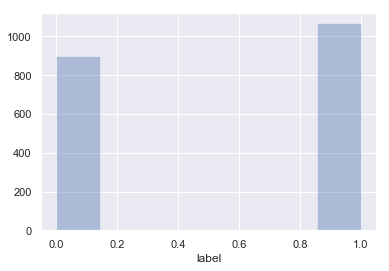

In [230]:
sns.distplot(data.label, kde = False)

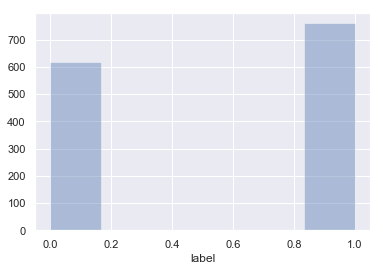

In [231]:

sns.distplot(y_train,kde=False)

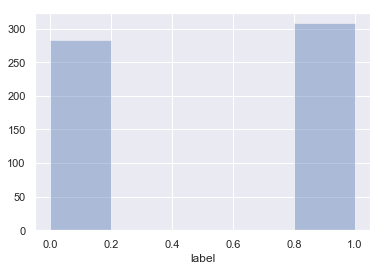

In [232]:
sns.distplot(y_test,kde=False)

## Feature Selection - Checking Correlation to get perfect set of indipendent variables


In [233]:
cr = data.corr()

In [234]:
cr

,index,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,label,s1,s2,s3,s4,s5
index,1.000000,1.000000,-0.014990,-0.002877,-0.011640,-0.009962,0.007184,-0.004328,-0.009314,-0.015797,0.004248,-0.009764,0.031169
City_ID,1.000000,1.000000,-0.014990,-0.002877,-0.011640,-0.009962,0.007184,-0.004328,-0.009314,-0.015797,0.004248,-0.009764,0.031169
doctor_availability_rate,-0.014990,-0.014990,1.000000,0.921016,0.924841,-0.713430,-0.771482,-0.637804,0.004583,-0.007805,0.033988,-0.005881,-0.026342
hospital_availability_rate,-0.002877,-0.002877,0.921016,1.000000,0.922355,-0.723997,-0.779568,-0.647100,0.017524,-0.010093,0.033258,-0.015726,-0.026353
annual_per_capita,-0.011640,-0.011640,0.924841,0.922355,1.000000,-0.714865,-0.772319,-0.640099,0.000053,-0.004407,0.037089,-0.013474,-0.020780
population_density,-0.009962,-0.009962,-0.713430,-0.723997,-0.714865,1.000000,0.898974,0.643897,0.010617,0.006437,-0.030936,0.003689,0.011340
death_rate,0.007184,0.007184,-0.771482,-0.779568,-0.772319,0.898974,1.000000,0.737528,0.005216,0.000067,-0.029584,0.009230,0.016326
label,-0.004328,-0.004328,-0.637804,-0.647100,-0.640099,0.643897,0.737528,1.000000,-0.011775,0.002070,-0.024024,0.007380,0.027555
s1,-0.009314,-0.009314,0.004583,0.017524,0.000053,0.010617,0.005216,-0.011775,1.000000,-0.249645,-0.258627,-0.244543,-0.238231
s2,-0.015797,-0.015797,-0.007805,-0.010093,-0.004407,0.006437,0.000067,0.002070,-0.249645,1.000000,-0.264449,-0.250047,-0.243594


In [235]:
cr['label']

index                        -0.004328
City_ID                      -0.004328
doctor_availability_rate     -0.637804
hospital_availability_rate   -0.647100
annual_per_capita            -0.640099
population_density            0.643897
death_rate                    0.737528
label                         1.000000
s1                           -0.011775
s2                            0.002070
s3                           -0.024024
s4                            0.007380
s5                            0.027555
Name: label, dtype: float64

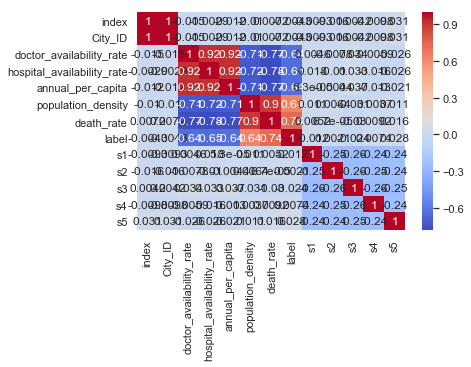

In [236]:
sns.heatmap(cr,annot=True,cmap="coolwarm")

## Conclusion - Selected independent variables : ##doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate, building linear Model.



In [237]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 438 to 1544
Data columns (total 10 columns):
index                         1376 non-null int64
City_ID                       1376 non-null int64
doctor_availability_rate      1376 non-null float64
hospital_availability_rate    1376 non-null float64
annual_per_capita             1376 non-null float64
population_density            1376 non-null float64
death_rate                    1376 non-null float64
s1                            1376 non-null float64
s2                            1376 non-null float64
s3                            1376 non-null float64
dtypes: float64(8), int64(2)
memory usage: 118.2 KB


In [238]:
X_train.drop(['City_ID','s1','s2','s3'],axis=1,inplace=True)

In [239]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 438 to 1544
Data columns (total 6 columns):
index                         1376 non-null int64
doctor_availability_rate      1376 non-null float64
hospital_availability_rate    1376 non-null float64
annual_per_capita             1376 non-null float64
population_density            1376 non-null float64
death_rate                    1376 non-null float64
dtypes: float64(5), int64(1)
memory usage: 75.2 KB


In [240]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 110 to 902
Data columns (total 10 columns):
index                         591 non-null int64
City_ID                       591 non-null int64
doctor_availability_rate      591 non-null float64
hospital_availability_rate    591 non-null float64
annual_per_capita             591 non-null float64
population_density            591 non-null float64
death_rate                    591 non-null float64
s1                            591 non-null float64
s2                            591 non-null float64
s3                            591 non-null float64
dtypes: float64(8), int64(2)
memory usage: 50.8 KB


In [241]:
X_test.drop(['City_ID','s1','s2','s3'],axis=1,inplace=True)

In [242]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 110 to 902
Data columns (total 6 columns):
index                         591 non-null int64
doctor_availability_rate      591 non-null float64
hospital_availability_rate    591 non-null float64
annual_per_capita             591 non-null float64
population_density            591 non-null float64
death_rate                    591 non-null float64
dtypes: float64(5), int64(1)
memory usage: 32.3 KB



## Check for logistic Relation

In [243]:
import seaborn as sns; sns.set(color_codes=True)

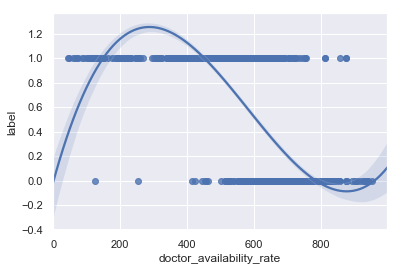

In [244]:
ax = sns.regplot(x=X_train.doctor_availability_rate, y=y_train,order=3)

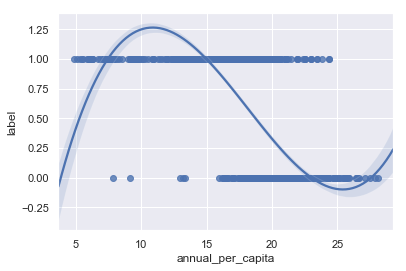

In [245]:
ax = sns.regplot(x=X_train.annual_per_capita, y=y_train,order=3)

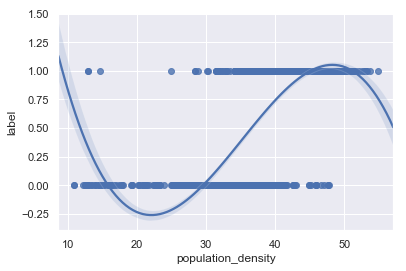

In [246]:
ax = sns.regplot(x=X_train.population_density, y=y_train,order=3)

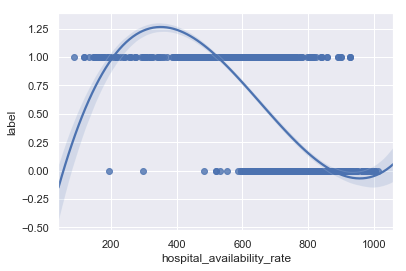

In [247]:
ax = sns.regplot(x=X_train.hospital_availability_rate, y=y_train,order=3)

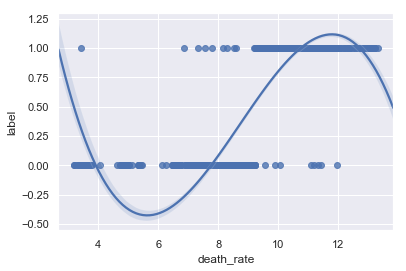

In [248]:
ax = sns.regplot(x=X_train.death_rate, y=y_train,order=3)

In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
lr = LogisticRegression()

# Train the model using the training sets

In [251]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [252]:
lr.intercept_

array([-0.07834958])

In [253]:
lr.coef_

array([[-1.69001135e-04, -7.01843652e-03, -6.27861753e-03,
        -4.11982833e-01, -6.87491862e-04,  1.82714437e+00]])

In [254]:
## Predicting death_rate for test dataset using model

In [255]:
y_pred = lr.predict(X_test)

In [257]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [258]:
prob = lr.predict_proba(X_test)

In [259]:
prob

array([[9.95976354e-01, 4.02364627e-03],
       [6.56435140e-01, 3.43564860e-01],
       [4.12842201e-01, 5.87157799e-01],
       ...,
       [9.13868643e-01, 8.61313566e-02],
       [1.18399760e-03, 9.98816002e-01],
       [2.62597226e-05, 9.99973740e-01]])

In [260]:
res = pd.DataFrame({'y_act':y_test,'y_pred':y_pred,'Prob1':prob[:,1]})

In [263]:
res

,y_act,y_pred,Prob1
654,0,0,2.964915e-08
1716,0,0,3.892435e-08
185,0,0,7.238613e-08
503,0,0,9.120651e-08
188,0,0,1.246811e-07
1907,0,0,1.295487e-07
1530,0,0,1.873620e-07
1658,0,0,3.882579e-07
1960,0,0,4.331042e-07
1497,0,0,6.366275e-07


In [262]:
res = res.sort_values(by='Prob1')

## Analyze your model performance visually

## Model Evaluation - Ploting ROC

In [270]:
from sklearn.metrics import roc_curve

In [271]:
fpr, tpr,thresholds = roc_curve(y_test, prob[:,1])

In [272]:
import matplotlib.pyplot as plt

In [273]:
from matplotlib.pyplot import figure

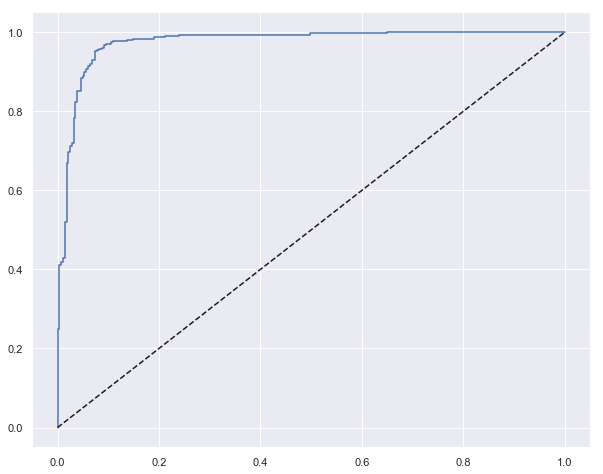

In [274]:
figure( figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], 'k--')

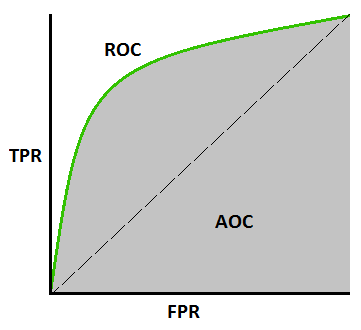

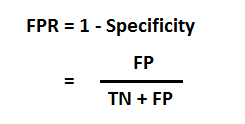

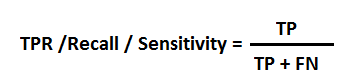

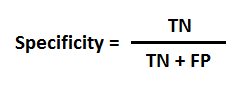

In [275]:
from sklearn import metrics

In [276]:
AUC = metrics.auc(fpr, tpr)

In [277]:
AUC

0.9746913863521637

## Model Evaluation - Confusion Matrix

In [278]:
from sklearn.metrics import confusion_matrix

In [279]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [280]:
cnf_matrix

array([[259,  24],
       [ 13, 295]], dtype=int64)

In [282]:
acc = (cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[1,1])


In [283]:
acc

0.937394247038917